# Simulating Evolution

In [21]:
! pip install livelossplot

In [22]:
import random
import time
from matplotlib import pyplot as plt
from livelossplot import PlotLosses

In [23]:
def clamp(num, min_value, max_value):
    return max(min(num, max_value), min_value)

In [24]:
def create_cell(parent_1, parent_2):
    if parent_1 is None or parent_2 is None:
        return dict(fitness=0,
                    a=random.randint(1, 100),
                    b=random.randint(1, 100),
                    c=random.randint(1, 100))
    else:
        return dict(fitness=0,
                    a=(parent_1['a'] + parent_2['a'] / 2),
                    b=(parent_1['b'] + parent_2['b'] / 2),
                    c=(parent_1['c'] + parent_2['c'] / 2))

In [25]:
def birth(offspring):
    return [create_cell(None, None) for _ in range(offspring)]

In [26]:
def evaluate(cells):
    for cell in cells:
        cell['fitness'] = 2 * cell['a'] - cell['b'] + cell['c']
    return cells

In [27]:
MUTATE_RNG = 5
MUTATE_RATE = 10

def mutate(cells):
    for cell in cells:
        if random.randint(1, 100) < MUTATE_RATE:
            cell['a'] = clamp(cell['a'] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
            cell['b'] = clamp(cell['b'] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
            cell['c'] = clamp(cell['c'] + random.randint(-MUTATE_RNG, MUTATE_RNG), 1, 100)
    return cells

In [28]:
RPRD_RATE = 25

def reproduce(cells):
    parents = sorted(cells,
                     key=lambda d: d['fitness'])[int(len(cells) / 2):]
    
    children = []
    
    for _ in range(len(parents) * 2):
        mates = random.sample(parents, 2)
        children.append(create_cell(mates[0], mates[1]))
    
    return mutate(children)

In [29]:
def run_generation(cells):
    cells = evaluate(cells)
    cells = reproduce(cells)
    return evaluate(cells)

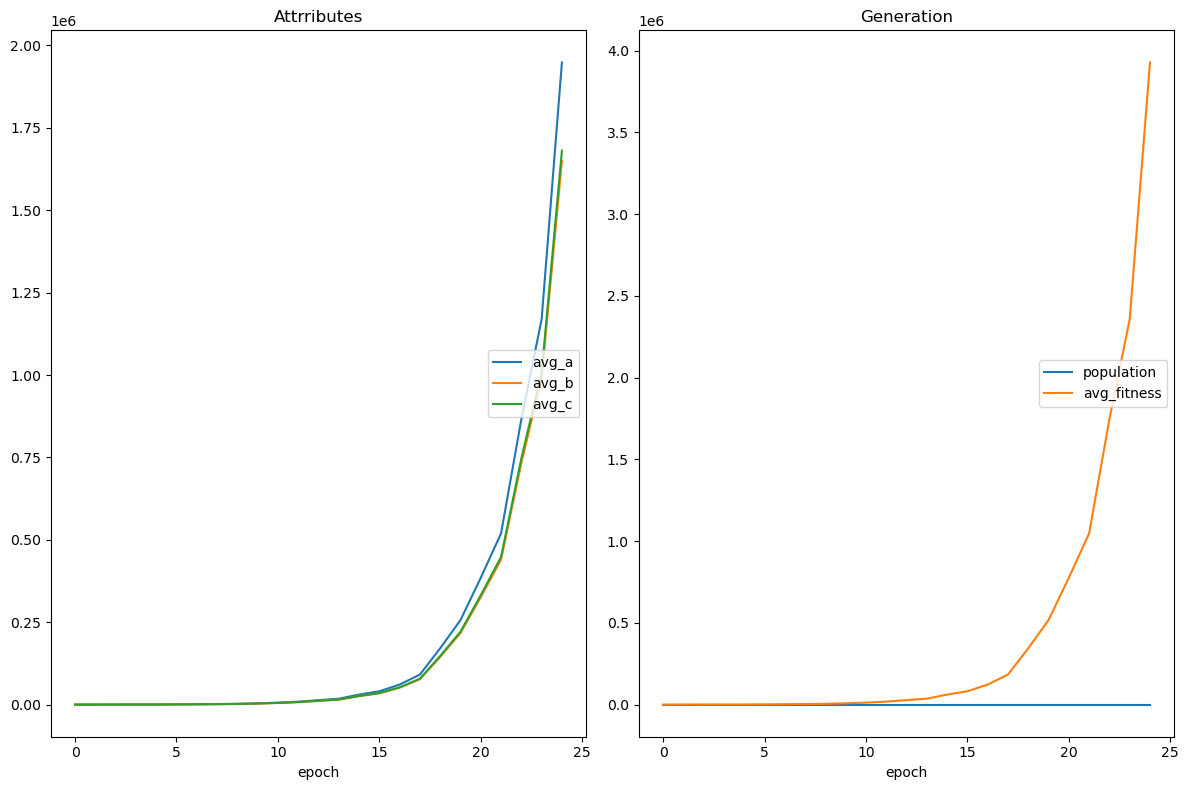

Attrributes
	avg_a            	 (min:  114.273, max: 1948522.624, cur: 1948522.624)
	avg_b            	 (min:  106.227, max: 1649767.570, cur: 1649767.570)
	avg_c            	 (min:   87.773, max: 1681052.043, cur: 1681052.043)
Generation
	population       	 (min:   10.000, max:   10.000, cur:   10.000)
	avg_fitness      	 (min:  210.091, max: 3928329.721, cur: 3928329.721)


In [30]:
GENERATIONS = 25
INITIAL_OFFSPRING = 10
MUTATION_RATE = 10
MUTATE_RNG = 20

cells = birth(INITIAL_OFFSPRING)

groups = {'Generation': ['population','avg_fitness'], 
          'Attrributes' : ['avg_a', 'avg_b', 'avg_c']}

liveloss = PlotLosses(groups=groups)

history = {}

for _ in range(GENERATIONS):
    cells = run_generation(cells)
    
    history['population'] = len(cells)   
    
    history['avg_fitness'] = sum([cell['fitness'] for cell in cells]) / (len(cells) + 1)
    
    history['avg_a'] = sum([cell['a'] for cell in cells]) / (len(cells) + 1) 
    
    history['avg_b'] = sum([cell['b'] for cell in cells]) / (len(cells) + 1) 
    
    history['avg_c'] = sum([cell['c'] for cell in cells]) / (len(cells) + 1) 
    
    liveloss.update(history)
    
    liveloss.send() 